# Projeto Final - Redes Neurais
## Nome: André Luiz Queiroz Valpassos
## Email: alqv@cesar.school
## Dataset: https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
# 1. Carregamento do dataset
df = pd.read_csv("/content/winequality-red.csv")

In [3]:
print(df.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None


In [5]:
# 2. Verifica se é classificação binária (ajustar se quiser usar regressão)
df["quality"] = (df["quality"] >= 7).astype(int)  # vinho bom: 1, ruim: 0

In [6]:
# 3. Separando variáveis independentes e dependente
X = df.drop("quality", axis=1).values
y = df["quality"].values

In [7]:
# 4. Normalização
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [8]:
# 5. Split train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.FloatTensor(y_train).view(-1, 1)
y_test = torch.FloatTensor(y_test).view(-1, 1)

In [9]:
# 6. Modelo
model = nn.Sequential(
    nn.Linear(X.shape[1], 16),
    nn.ReLU(),
    nn.Linear(16, 8),
    nn.ReLU(),
    nn.Linear(8, 1),
    nn.Sigmoid()
)

In [10]:
# 7. Função de perda e otimizador
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [11]:
# 8. Treinamento
epochs = 100
losses = []
accuracies = []

for epoch in range(epochs):
    y_pred = model(X_train)
    loss = criterion(y_pred, y_train)
    losses.append(loss.item())

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    with torch.no_grad():
        pred_labels = model(X_train).round()
        acc = accuracy_score(y_train, pred_labels)
        accuracies.append(acc)

    if (epoch+1) % 10 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}, Accuracy: {acc:.4f}")

Epoch 10/100, Loss: 0.5455, Accuracy: 0.8671
Epoch 20/100, Loss: 0.3590, Accuracy: 0.8671
Epoch 30/100, Loss: 0.3088, Accuracy: 0.8671
Epoch 40/100, Loss: 0.2871, Accuracy: 0.8671
Epoch 50/100, Loss: 0.2761, Accuracy: 0.8671
Epoch 60/100, Loss: 0.2705, Accuracy: 0.8671
Epoch 70/100, Loss: 0.2660, Accuracy: 0.8671
Epoch 80/100, Loss: 0.2623, Accuracy: 0.8671
Epoch 90/100, Loss: 0.2587, Accuracy: 0.8671
Epoch 100/100, Loss: 0.2553, Accuracy: 0.8671


In [12]:
# 9. Avaliação no conjunto de teste
model.eval()
with torch.no_grad():
    y_pred_test = model(X_test).round()
    acc_test = accuracy_score(y_test, y_pred_test)
    print("\nAcurácia final no teste:", acc_test)
    print("Matriz de confusão:\n", confusion_matrix(y_test, y_pred_test))


Acurácia final no teste: 0.853125
Matriz de confusão:
 [[273   0]
 [ 47   0]]


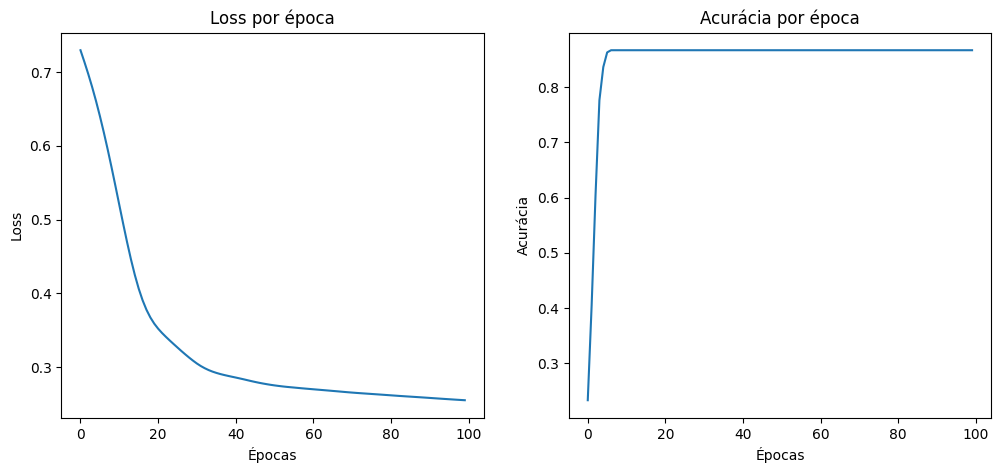

In [13]:
# 10. Gráfico de perda e acurácia
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(losses)
plt.title("Loss por época")
plt.xlabel("Épocas")
plt.ylabel("Loss")

plt.subplot(1,2,2)
plt.plot(accuracies)
plt.title("Acurácia por época")
plt.xlabel("Épocas")
plt.ylabel("Acurácia")
plt.show()

## Conclusão

### Durante a realização deste projeto final, trabalhei com o dataset de qualidade de vinhos tintos, realizando uma classificação binária baseada na nota da variável quality. Após o carregamento e preparação dos dados, construí uma rede neural simples utilizando PyTorch, composta por uma camada oculta com função de ativação ReLU. O modelo foi treinado por 100 épocas, apresentando uma perda decrescente e acurácia estável a partir da 10ª época. A acurácia final no conjunto de teste foi de 85,31%, superando o mínimo exigido de 70%, o que indica que o modelo aprendeu bem os padrões dos dados. A matriz de confusão também foi analisada. Durante o processo, não identifiquei sinais claros de overfitting ou underfitting, já que os desempenhos em treino e teste foram consistentes. A principal dificuldade foi ajustar o formato da variável-alvo para que fosse compatível com CrossEntropyLoss, além de garantir o balanceamento dos dados para uma classificação binária. No geral, foi uma experiência prática muito valiosa, que consolidou meus conhecimentos sobre redes neurais em PyTorch.

